# МКР для решения 2D линейного эллиптического уравнения скалярного переменного

## Задача c граничными условиями Дирихле

Необходимо найти поле температуры $T$ в прямоугольной пластине. Значение поля на каждой грани пластины известно. По площади пластины распределены однородные источники тепла с плотностью $f = 1.$. Пластина изотропна и коэффициент теплопроводности $\lambda=1.$.

![fd_2d_task](../images/fd_2d_task.svg)

### Формулировка математической модели

\begin{align}
&\frac{\partial}{\partial x_1}\left(\lambda \frac{\partial T}{\partial x_1}\right) + \frac{\partial}{\partial x_2}\left(\lambda \frac{\partial T}{\partial x_2}\right) + f  = 0. \\
&T = T_1, x_1 \in [0, L_1], x2 = 0 \\
&T = T_2, x_1 = 0, x2 \in [0, L_2] \\
&T = T_3, x_1 \in [0, L_1], x2 = L_2\\
&T = T_4, x_1 = L_1, x2 \in [0, L_2]
\end{align}

### Численное решение

1. Построим конечно-разностную сетку:



<IPython.core.display.Javascript object>


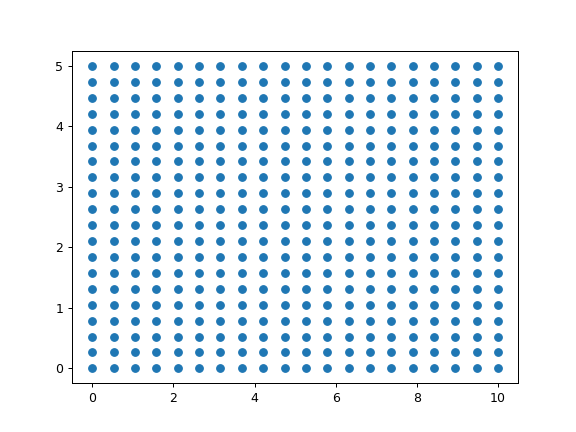

In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
L_1, L_2 = 10, 5
n_1, n_2 = 20, 20 # количество узлов
h_1, h_2 = L_1/(n_1 - 1), L_2/(n_2 - 1) # шаг конечной разности


x_nodes = np.array([[i * h_1, j * h_2] for i in range(n_1) for j in range(n_2)])
fig = plt.figure()
plt.scatter(x_nodes[:, 0], x_nodes[:, 1])

2. Используя конечно разностные аппроксимации производных запишем уравнение для каждого узла $(i, j)$ конечно-разностной сетки:

\begin{align}
\frac{\partial}{\partial x_1} \left(\lambda \frac{\partial T_{i,j}}{\partial x_1}\right)\approx \lambda \frac{T_{i+1, j} - 2T_{i, j} + T_{i-1, j}}{h_1^2} \\
\frac{\partial}{\partial x_2} \left(\lambda \frac{\partial T_{i, j}}{\partial x_2}\right)\approx \lambda \frac{T_{i, j+1} - 2T_{i, j} + T_{i, j-1}}{h_2^2}
\end{align}

![fd_1d](../images/fd_2d_schema.svg)

\begin{align}
\lambda \frac{T_{i+1, j} - 2T_{i, j} + T_{i-1, j}}{h_1^2} + \lambda \frac{T_{i, j+1} - 2T_{i, j} + T_{i, j-1}}{h_2^2} + f_i = 0
\end{align}

Для поиска решения с помощью методов линейной алгебры необходимо свести систему к матричному виду:

\begin{align}
[A] \{T\} = \{f\},
\end{align}

где $[A]$ - матрица коэфициентов, $\{T\}$ - вектор температур в узлах сетки.

Для построения матрицы коэффициентов необходимо двумерную нумерацию узлов свести к одномерной. Для этого заменим индексы $i, j$ на индекс $k = i * n_1 + j$

In [2]:
def k(i, j):
    return i * (n_1) + j

l = 1
f_i = 5

A = np.zeros(((n_1) * (n_2), (n_1) * (n_2)))
f = np.zeros((n_1) * (n_2))

for i in range(1, n_1 - 1):
    for j in range(1, n_2 - 1):
        A[k(i, j)][k(i + 1, j)] = l / h_1 ** 2
        A[k(i, j)][k(i - 1, j)] = l / h_1 ** 2
        
        A[k(i, j)][k(i, j)] = l * (-2. / h_1 ** 2 - 2. / h_2 **2)
        
        
        A[k(i, j)][k(i, j - 1)] = l / h_2 ** 2
        A[k(i, j)][k(i, j + 1)] = l / h_2 ** 2
        
        f[k(i, j)] = -f_i

3. Добавим в систему граничные условия:

In [3]:
# Левая сторона
T = 20
for i in range(n_1):
    A[k(i, 0)][k(i, 0)] = 1.
    f[k(i, 0)] = T

# Правая сторона
T = 40
for i in range(n_1):
    A[k(i, n_2 - 1)][k(i, n_2 - 1)] = 1.
    f[k(i, n_2 - 1)] = T
    
# Верх
T = 30
for j in range(n_2):
    A[k(0, j)][k(0, j)] = 1.
    f[k(0, j)] = T

# Низ
T = 10
for j in range(n_2):
    A[k(n_1 - 1, j)][k(n_1 - 1, j)] = 1.
    f[k(n_1 - 1, j)] = T

4. Решим СЛАУ:

In [4]:
T = np.linalg.solve(A, f)

### Анализ решения

<IPython.core.display.Javascript object>


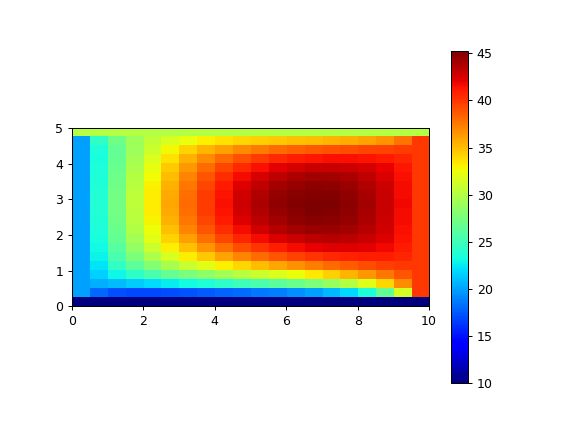

In [5]:
fig = plt.figure()
plt.imshow(T.reshape(n_1, n_2), cmap=plt.cm.jet, interpolation='none', extent=[0, L_1, 0, L_2])
plt.colorbar()

<IPython.core.display.Javascript object>


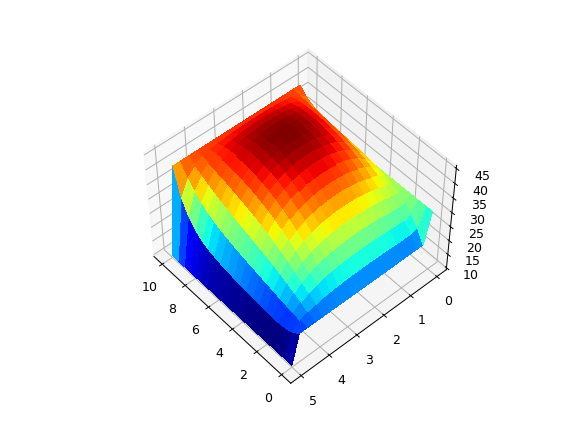

In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x = [i * h_1 for i in range(n_1)]
y = [i * h_2 for i in range(n_2)]
X, Y = np.meshgrid(x, y)
Z = T.reshape(X.shape)

surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, linewidth=0, antialiased=False)

## Задача c граничными условиями Неймана

Необходимо найти поле температуры $T$ в прямоугольной пластине. Значение температуры известно для нижней и верхней граней пластины. К левой грани подводят тепло со значением теплового потока $q_l = 1$, а справа отводят тепло со значением плотности теплового потока $q_r = 2$. По площади пластины распределены однородные источники тепла с плотностью $f = 1.$. Пластина изотропна и коэффициент теплопроводности $\lambda=1.$.

![fd_2d_task](../images/fd_2d_task_2.svg)

### Формулировка математической модели

\begin{align}
&\frac{\partial}{\partial x_1}\left(\lambda \frac{\partial T}{\partial x_1}\right) + \frac{\partial}{\partial x_2}\left(\lambda \frac{\partial T}{\partial x_2}\right) + f  = 0. \\
&T = T_b, & x_1 \in [0, L_1], x2 = 0 \\
&-\vec{q} \cdot \vec{n} = q_l, & x_1 = 0, x2 \in [0, L_2] \\
&T = T_t, & x_1 \in [0, L_1], x2 = L_2\\
&-\vec{q} \cdot \vec{n} = -q_r, & x_1 = L_1, x2 \in [0, L_2]
\end{align}

### Численное решение

1. Построим конечно-разностную сетку:

## Упражнения

1. Учет граничных условий Дирихле без увеличения размерности задачи